In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('D:/Purdue-MSBAIM/Module3/CCAC Competition/DIWBB_Training.csv')
test = pd.read_csv('D:/Purdue-MSBAIM/Module3/CCAC Competition/DIWBB_Test.csv')

C:\Users\Jensen R\AppData\Local\Temp\ipykernel_22884\1206600005.py:1: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('D:/Purdue-MSBAIM/Module3/CCAC Competition/DIWBB_Training.csv')


In [5]:
train.head()

,RecordID,ChampionshipYear,CustomerID,CustomerCity,CustomerState,CustomerZipCode,CustomerInstitutionAffinity,IsCustomerInNCAAMembership,HasCustomerClickedOrOpenedEmailsSixMonthsPrior,CustomerFirstWBBActionDate,...,EventSession,EventBeginDate,EventEndDate,HostingInstitution,FacilityName,FacilityDescription,FacilityCity,FacilityState,FacilityZipCode,ActivityType
0,4,2022,757758,Huntsville,TX,77340,(UNK),No,(N/A),10/28/13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
1,14,2022,574752,Salem,OR,97304,(UNK),No,Yes,10/12/19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
2,20,2022,741837,(UNK),UNK,(UNK),(UNK),No,Yes,10/28/13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
3,21,2022,237618,(UNK),UNK,(UNK),(UNK),No,Yes,10/28/13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
4,23,2022,799761,(UNK),UNK,(UNK),(UNK),No,(N/A),3/20/18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity


In [6]:
train['ActivityType'].value_counts()

No Activity                 191311
Primary Purchase             13026
Transfer Recipient            3283
Secondary Purchase             879
Multiple Activities            659
Other Secondary Activity       108
Name: ActivityType, dtype: int64

In [9]:
# List of your categorical columns
categorical_columns = ['ChampionshipYear', 'IsCustomerInNCAAMembership', 
                       'HasCustomerClickedOrOpenedEmailsSixMonthsPrior', 
                       'IsEventFinalSite', 'EventSession']

# Initialize a dictionary to store Chi-square results
chi_square_results = {}

# Calculate Chi-square for each categorical column
for column in categorical_columns:
    contingency_table = pd.crosstab(train[column], train['ActivityType'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[column] = {'chi2': chi2, 'p-value': p}

# Print the results
for column, results in chi_square_results.items():
    print(f"{column}: Chi2 = {results['chi2']}, p-value = {results['p-value']}")

ChampionshipYear: Chi2 = 1343.7217332941511, p-value = 2.151716618910227e-288
IsCustomerInNCAAMembership: Chi2 = 29.966237647002337, p-value = 0.0008676016980550262
HasCustomerClickedOrOpenedEmailsSixMonthsPrior: Chi2 = 7671.3046039562, p-value = 0.0
IsEventFinalSite: Chi2 = 5691.004457462701, p-value = 0.0
EventSession: Chi2 = 7845.52010930728, p-value = 0.0


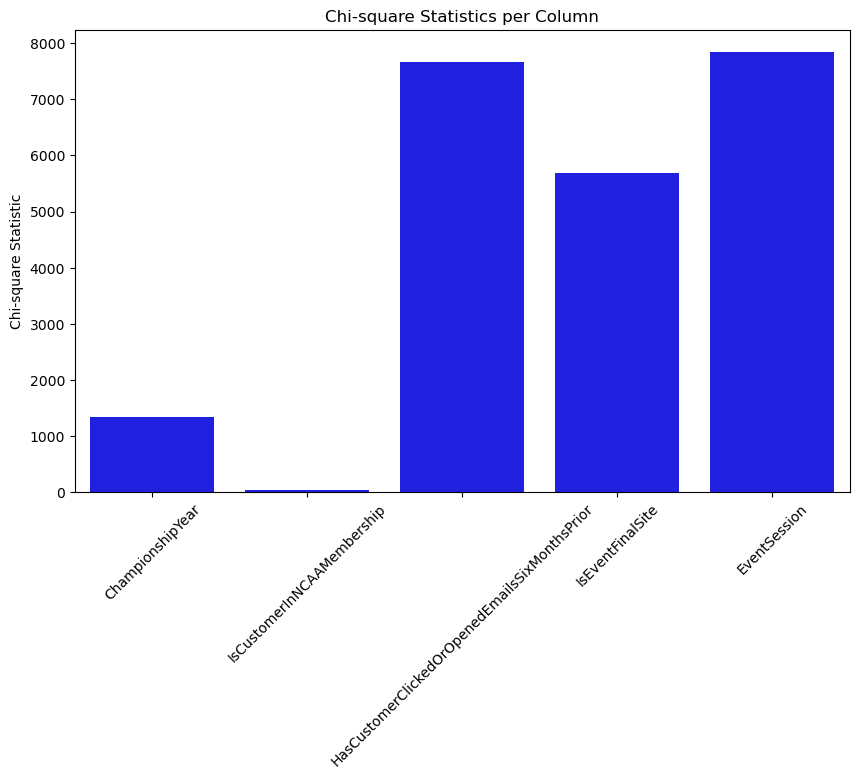

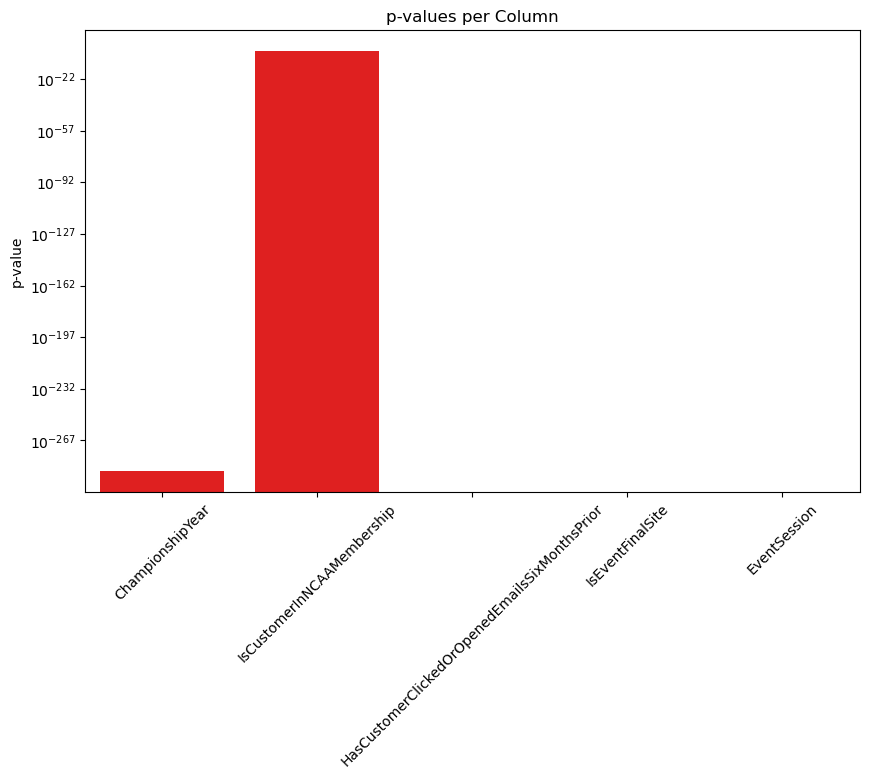

In [11]:
# List of your categorical columns
categorical_columns = ['ChampionshipYear', 'IsCustomerInNCAAMembership', 
                       'HasCustomerClickedOrOpenedEmailsSixMonthsPrior', 
                       'IsEventFinalSite', 'EventSession']

# Initialize lists to store Chi-square results and p-values
chi2_values = []
p_values = []

# Calculate Chi-square for each categorical column
for column in categorical_columns:
    contingency_table = pd.crosstab(train[column], train['ActivityType'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

# Plotting Chi-square values
plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_columns, y=chi2_values, color='blue')
plt.title('Chi-square Statistics per Column')
plt.ylabel('Chi-square Statistic')
plt.xticks(rotation=45)
plt.show()

# Plotting p-values
plt.figure(figsize=(10, 6))
sns.barplot(x=categorical_columns, y=p_values, color='red')
plt.title('p-values per Column')
plt.ylabel('p-value')
plt.yscale('log')  # Log scale for better visibility of small p-values
plt.xticks(rotation=45)
plt.show()

## Gradient Boosting

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



# Convert datetime columns
train['CustomerFirstWBBActionDate'] = pd.to_datetime(train['CustomerFirstWBBActionDate'])
train['Year'] = train['CustomerFirstWBBActionDate'].dt.year
train['Month'] = train['CustomerFirstWBBActionDate'].dt.month
train['Day'] = train['CustomerFirstWBBActionDate'].dt.day

# Drop columns that are less relevant or have a lot of unique values
train.drop(columns=['RecordID', 'CustomerID', 'CustomerFirstWBBActionDate'], inplace=True)

# Define categorical columns for one-hot encoding
categorical_cols = [col for col in train.columns if train[col].dtype == "object" and col != 'ActivityType']

# Define numerical columns
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')   

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = GradientBoostingClassifier()

# Create the preprocessing and modeling pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Split data into target and features
y = train['ActivityType']
X = train.drop('ActivityType', axis=1)

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['ChampionshipYear', 'Year',
                                                   'Month', 'Day']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CustomerCity',
                                                   'CustomerState',
                                                   'CustomerZipCode',
                                                   'CustomerInstitutionAffi...
                                                   'HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
                                                   'CustomerFirstWBBPurchaseDate',
                                                   'CustomerLastWBBActionDate',
                                                   'CustomerLastWBBPurchaseDate',
                                                   'EventRoundName',
                                                   'IsEventFinalSite',
                                                   'EventSession',
                                                   'EventBeginDate',
                                                   'EventEndDate',
                                                   'HostingInstitution',
                                                   'FacilityName',
                                                   'FacilityDescription',
                                                   'FacilityCity',
                                                   'FacilityState',
                                                   'FacilityZipCode'])])),
                ('model', GradientBoostingClassifier())])

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the training set
y_pred_train = clf.predict(X_train)

# Predict on the validation set
y_pred_valid = clf.predict(X_valid)

# Evaluate the model on the training set
print("Classification Report (Training Set):")
print(classification_report(y_train, y_pred_train))

print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train, y_pred_train))

# Evaluate the model on the validation set
print("\nClassification Report (Validation Set):")
print(classification_report(y_valid, y_pred_valid))

print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_valid, y_pred_valid))

Classification Report (Training Set):
                          precision    recall  f1-score   support

     Multiple Activities       0.82      0.23      0.36       526
             No Activity       1.00      1.00      1.00    153001
Other Secondary Activity       0.94      0.55      0.70        87
        Primary Purchase       0.92      0.94      0.93     10449
      Secondary Purchase       1.00      0.14      0.25       703
      Transfer Recipient       0.66      0.85      0.74      2646

                accuracy                           0.99    167412
               macro avg       0.89      0.62      0.66    167412
            weighted avg       0.99      0.99      0.99    167412

Confusion Matrix (Training Set):
[[   121      0      0    100      0    305]
 [     0 153001      0      0      0      0]
 [     0      0     48     13      0     26]
 [     3      0      2   9873      0    571]
 [     0      0      0    332    100    271]
 [    23      0      1    360      0   22

In [6]:
# Fill missing values
for col in ['CustomerState', 'CustomerCity']:
    test[col].fillna('Unknown', inplace=True)

# Convert datetime columns
test['CustomerFirstWBBActionDate'] = pd.to_datetime(test['CustomerFirstWBBActionDate'])
test['Year'] = test['CustomerFirstWBBActionDate'].dt.year
test['Month'] = test['CustomerFirstWBBActionDate'].dt.month
test['Day'] = test['CustomerFirstWBBActionDate'].dt.day

# Drop columns that are less relevant or have a lot of unique values
test.drop(columns=['RecordID', 'CustomerID', 'CustomerFirstWBBActionDate'], inplace=True)

# Define categorical columns for one-hot encoding
categorical_cols = [col for col in test.columns if test[col].dtype == "object"]

# Define numerical columns
numerical_cols = [col for col in test.columns if test[col].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Predict the target variable on the test set
test_predictions = clf.predict(test)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'ActivityType_Predictions': test_predictions})

# Save the predictions to a CSV file
predictions_file_path = 'D:/Purdue-MSBAIM/Module3/CCAC Competition/test_predictions.csv'  # Replace with your desired file path
predictions_df.to_csv(predictions_file_path, index=False)

print(f"Predictions saved to {predictions_file_path}")

Predictions saved to D:/Purdue-MSBAIM/Module3/CCAC Competition/test_predictions.csv


## Gradient Boosting 2

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Fill missing values
for col in ['EventRoundName','IsEventFinalSite','EventSession','EventBeginDate','EventEndDate',
           'CustomerFirstWBBActionDate','CustomerLastWBBActionDate','CustomerFirstWBBPurchaseDate','CustomerLastWBBActionDate']:
    train[col].fillna('(UNK)', inplace=True)

# Convert datetime columns
train['CustomerFirstWBBActionDate'] = pd.to_datetime(train['CustomerFirstWBBActionDate'],errors='coerce')
train['CustomerLastWBBActionDate'] = pd.to_datetime(train['CustomerLastWBBActionDate'],errors='coerce')
train['CustomerFirstWBBPurchaseDate'] = pd.to_datetime(train['CustomerFirstWBBPurchaseDate'],errors='coerce')
train['CustomerLastWBBActionDate'] = pd.to_datetime(train['CustomerLastWBBActionDate'],errors='coerce')

# Convert to datetime
train['EventBeginDate'] = pd.to_datetime(train['EventBeginDate'], errors='coerce')
train['CustomerFirstWBBActionDate'] = pd.to_datetime(train['CustomerFirstWBBActionDate'], errors='coerce')

# Calculate the difference in days
train['DaysBeforeEvent_Action'] = (train['EventBeginDate'] - train['CustomerFirstWBBActionDate']).dt.days

# Repeat for 'CustomerFirstWBBPurchaseDate'
train['CustomerFirstWBBPurchaseDate'] = pd.to_datetime(train['CustomerFirstWBBPurchaseDate'], errors='coerce')
train['DaysBeforeEvent_Purchase'] = (train['EventBeginDate'] - train['CustomerFirstWBBPurchaseDate']).dt.days


# Drop columns that are less relevant or have a lot of unique values
train.drop(columns=['RecordID', 'CustomerID', 'CustomerFirstWBBActionDate','HostingInstitution','FacilityName',
                    'FacilityDescription','FacilityCity','FacilityState','FacilityZipCode'], inplace=True)

# Define categorical columns for one-hot encoding
categorical_cols = [col for col in train.columns if train[col].dtype == "object" and col != 'ActivityType']

# Define numerical columns
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = GradientBoostingClassifier()

# Create the preprocessing and modeling pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Define a grid of hyperparameters to tune
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Split data into target and features
y = train['ActivityType']
X = train.drop('ActivityType', axis=1)

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and optionally evaluate on validation set
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_valid, y_valid)
print("Validation Accuracy:", accuracy)

Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Validation Accuracy: 0.9875519663592488


In [4]:
# Fill missing values
for col in ['CustomerState','CustomerCity','EventRoundName','IsEventFinalSite','EventSession','EventBeginDate','EventEndDate',
           'CustomerFirstWBBActionDate','CustomerLastWBBActionDate','CustomerFirstWBBPurchaseDate','CustomerLastWBBActionDate']:
    test[col].fillna('(UNK)', inplace=True)

# Convert datetime columns
test['CustomerFirstWBBActionDate'] = pd.to_datetime(test['CustomerFirstWBBActionDate'],errors='coerce')
test['CustomerLastWBBActionDate'] = pd.to_datetime(test['CustomerLastWBBActionDate'],errors='coerce')
test['CustomerFirstWBBPurchaseDate'] = pd.to_datetime(test['CustomerFirstWBBPurchaseDate'],errors='coerce')
test['CustomerLastWBBActionDate'] = pd.to_datetime(test['CustomerLastWBBActionDate'],errors='coerce')

# Convert to datetime
test['EventBeginDate'] = pd.to_datetime(test['EventBeginDate'], errors='coerce')
test['CustomerFirstWBBActionDate'] = pd.to_datetime(test['CustomerFirstWBBActionDate'], errors='coerce')

# Calculate the difference in days
test['DaysBeforeEvent_Action'] = (test['EventBeginDate'] - test['CustomerFirstWBBActionDate']).dt.days

# Repeat for 'CustomerFirstWBBPurchaseDate'
test['CustomerFirstWBBPurchaseDate'] = pd.to_datetime(test['CustomerFirstWBBPurchaseDate'], errors='coerce')
test['DaysBeforeEvent_Purchase'] = (test['EventBeginDate'] - test['CustomerFirstWBBPurchaseDate']).dt.days


# Drop columns that are less relevant or have a lot of unique values
test.drop(columns=['RecordID', 'CustomerID', 'CustomerFirstWBBActionDate','HostingInstitution','FacilityName',
                    'FacilityDescription','FacilityCity','FacilityState','FacilityZipCode'], inplace=True)

# Define categorical columns for one-hot encoding
categorical_cols = [col for col in train.columns if train[col].dtype == "object" and col != 'ActivityType']

# Define numerical columns
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Predict the target variable on the test set using the best model
test_predictions = best_model.predict(test)  # Use best_model instead of clf

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'ActivityType_Predictions': test_predictions})

# Save the predictions to a CSV file
predictions_file_path = 'D:/Purdue-MSBAIM/Module3/CCAC Competition/test_predictions_grid.csv'  # Replace with your desired file path
predictions_df.to_csv(predictions_file_path, index=False)

print(f"Predictions saved to {predictions_file_path}")

Predictions saved to D:/Purdue-MSBAIM/Module3/CCAC Competition/test_predictions_grid.csv
